In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣ Load dataset
# ============================================================
df = pd.read_csv(r"C:\work\\Flam_R-D\\xy_data.csv")

x_data = df['x'].values
y_data = df['y'].values

# Ensure sorted order for consistent comparison
sorted_idx = np.argsort(x_data)
x_data = x_data[sorted_idx]
y_data = y_data[sorted_idx]

# Parameter range for t
t_vals = np.linspace(6, 60, len(x_data))

In [2]:

# ============================================================
# 2️⃣ Define the model
# ============================================================
def curve_model(t, theta, M, X):
    theta = np.deg2rad(theta)
    x = (t * np.cos(theta)
         - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta)
         + X)
    y = (42
         + t * np.sin(theta)
         + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta))
    return x, y


In [3]:

# ============================================================
# 3️⃣ Define L1 loss function
# ============================================================
def l1_loss(params, t, x_true, y_true):
    theta, M, X = params
    x_pred, y_pred = curve_model(t, theta, M, X)
    
    # Interpolate predicted curve to match x_true ordering
    # Sort x_pred so we can interpolate properly
    sort_idx = np.argsort(x_pred)
    x_pred_sorted, y_pred_sorted = x_pred[sort_idx], y_pred[sort_idx]
    
    # Interpolate predicted y to observed x positions
    y_interp = np.interp(x_true, x_pred_sorted, y_pred_sorted)
    
    # L1 distance (Manhattan)
    l1_dist = np.sum(np.abs(y_true - y_interp))
    return l1_dist


In [4]:

# ============================================================
# 4️⃣ Optimization using Differential Evolution
# ============================================================
bounds = [(0, 50), (-0.05, 0.05), (0, 100)]

result = differential_evolution(
    l1_loss,
    bounds=bounds,
    args=(t_vals, x_data, y_data),
    strategy='best1bin',
    maxiter=5000,
    popsize=125,
    tol=1e-7,
    mutation=(0.5, 1.0),
    recombination=0.7,
    seed=42,
    disp=True
)

best_theta, best_M, best_X = result.x

print("\n🧠 FINAL PARAMETERS:")
print(f"Theta (deg): {best_theta:.6f}")
print(f"M: {best_M:.8f}")
print(f"X: {best_X:.6f}")
print(f"Minimum L1 Distance: {result.fun:.6f}")


differential_evolution step 1: f(x)= 2549.5641216444
differential_evolution step 2: f(x)= 959.3144140644827
differential_evolution step 3: f(x)= 959.3144140644827
differential_evolution step 4: f(x)= 823.3785593429925
differential_evolution step 5: f(x)= 823.3785593429925
differential_evolution step 6: f(x)= 823.3785593429925
differential_evolution step 7: f(x)= 455.6768231217234
differential_evolution step 8: f(x)= 369.93337885412336
differential_evolution step 9: f(x)= 369.93337885412336
differential_evolution step 10: f(x)= 326.97698322306417
differential_evolution step 11: f(x)= 326.97698322306417
differential_evolution step 12: f(x)= 326.97698322306417
differential_evolution step 13: f(x)= 129.17007359973235
differential_evolution step 14: f(x)= 129.17007359973235
differential_evolution step 15: f(x)= 62.52520422226355
differential_evolution step 16: f(x)= 62.52520422226355
differential_evolution step 17: f(x)= 62.52520422226355
differential_evolution step 18: f(x)= 62.52520422226

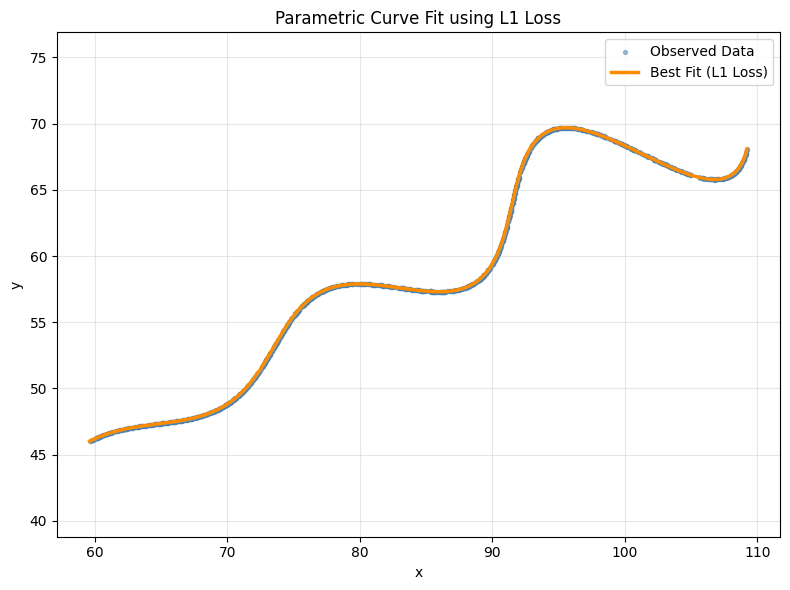

In [5]:

# ============================================================
# 5️⃣ Plotting the fitted curve vs data
# ============================================================
x_fit, y_fit = curve_model(t_vals, best_theta, best_M, best_X)

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, s=8, color='steelblue', alpha=0.5, label='Observed Data')
plt.plot(x_fit, y_fit, color='darkorange', lw=2.5, label='Best Fit (L1 Loss)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Parametric Curve Fit using L1 Loss")
plt.legend()
plt.grid(alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [6]:
# ============================================================
# 6️⃣ Print LaTeX / Desmos-ready Final Equation
# ============================================================

theta_deg, M, X = best_theta, best_M, best_X

eqn_str = (
    f"\\left( t*\\cos({theta_deg:.6f})"
    f" - e^{{{M:.8f}\\left|t\\right|}}\\cdot\\sin(0.3t)\\sin({theta_deg:.6f}) + {X:.6f}, "
    f"42 + t*\\sin({theta_deg:.6f})"
    f" + e^{{{M:.8f}\\left|t\\right|}}\\cdot\\sin(0.3t)\\cos({theta_deg:.6f}) \\right)"
)

print("\n📄 LaTeX/Desmos-ready Expression:\n")
print(eqn_str)



📄 LaTeX/Desmos-ready Expression:

\left( t*\cos(29.999980) - e^{0.03000023\left|t\right|}\cdot\sin(0.3t)\sin(29.999980) + 55.000005, 42 + t*\sin(29.999980) + e^{0.03000023\left|t\right|}\cdot\sin(0.3t)\cos(29.999980) \right)
